In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from google.colab import drive
drive.mount('/content/gdrive')

import os

path = "/content/gdrive/MyDrive/praktikum_ml/praktikum06"
try:
    print(os.listdir(path))
except FileNotFoundError:
    print(f"Directory not found: {path}")

df = pd.read_csv(path + "/data/breast-cancer.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['data', 'reports', 'model', 'notebooks']


In [6]:
from sklearn.preprocessing import LabelEncoder

# Hapus kolom ID
df_bc_clean = df.drop(columns=['id'])

# Ubah diagnosis menjadi numerik
le_bc = LabelEncoder()
df_bc_clean['diagnosis'] = le_bc.fit_transform(df_bc_clean['diagnosis'])

# Pisahkan fitur dan target
X_bc = df_bc_clean.drop(columns=['diagnosis'])
y_bc = df_bc_clean['diagnosis']

# Lihat hasil
df_bc_clean.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
    X_bc, y_bc, test_size=0.2, random_state=42
)

# Standarisasi
scaler_bc = StandardScaler()
X_train_bc = scaler_bc.fit_transform(X_train_bc)
X_test_bc = scaler_bc.transform(X_test_bc)


In [9]:
from sklearn.svm import SVC

# Membuat dan melatih model SVM
svm_bc = SVC(kernel='rbf', random_state=42)
svm_bc.fit(X_train_bc, y_train_bc)


SVC(random_state=42)

Akurasi Model SVM: 0.98


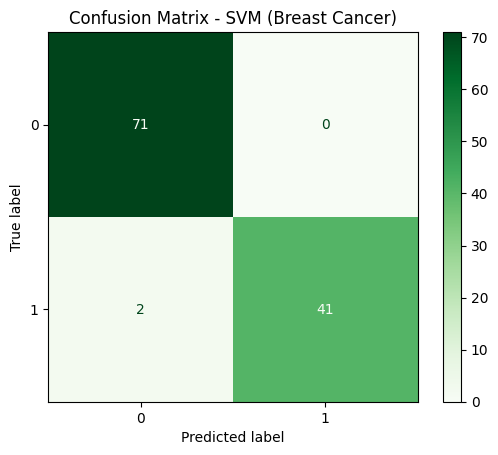

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prediksi
y_pred_bc = svm_bc.predict(X_test_bc)

# Akurasi
acc_bc = accuracy_score(y_test_bc, y_pred_bc)
print(f"Akurasi Model SVM: {acc_bc:.2f}")

# Confusion Matrix
cm_bc = confusion_matrix(y_test_bc, y_pred_bc)
disp_bc = ConfusionMatrixDisplay(confusion_matrix=cm_bc)
disp_bc.plot(cmap='Greens')
plt.title("Confusion Matrix - SVM (Breast Cancer)")
plt.show()


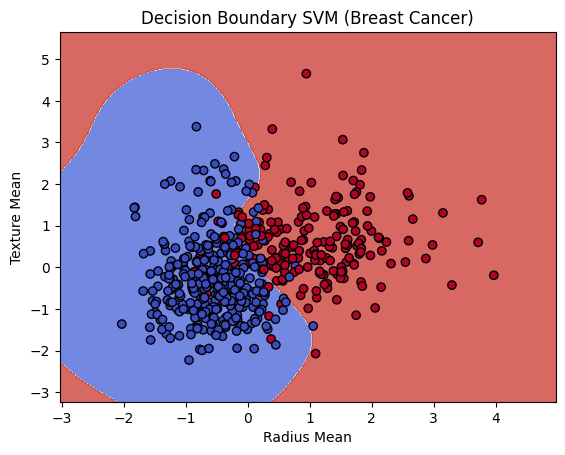

In [12]:
import numpy as np

# Ambil dua fitur saja (contoh: radius_mean dan texture_mean)
X_bc_vis = df_bc_clean[['radius_mean', 'texture_mean']].values
y_bc_vis = df_bc_clean['diagnosis'].values

# Standarisasi ulang
scaler_vis_bc = StandardScaler()
X_bc_vis = scaler_vis_bc.fit_transform(X_bc_vis)

# Model 2D SVM
svm_bc_vis = SVC(kernel='rbf', gamma=0.7)
svm_bc_vis.fit(X_bc_vis, y_bc_vis)

# Grid untuk decision boundary
x_min, x_max = X_bc_vis[:, 0].min() - 1, X_bc_vis[:, 0].max() + 1
y_min, y_max = X_bc_vis[:, 1].min() - 1, X_bc_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svm_bc_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_bc_vis[:, 0], X_bc_vis[:, 1], c=y_bc_vis, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.title("Decision Boundary SVM (Breast Cancer)")
plt.show()


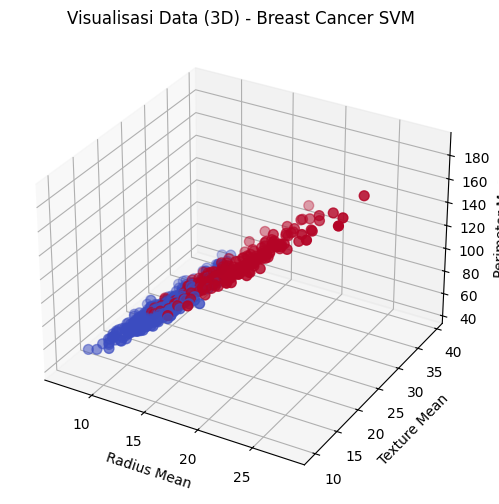

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df_bc_clean['radius_mean'], df_bc_clean['texture_mean'], df_bc_clean['perimeter_mean'],
    c=df_bc_clean['diagnosis'], cmap='coolwarm', s=50
)
ax.set_xlabel("Radius Mean")
ax.set_ylabel("Texture Mean")
ax.set_zlabel("Perimeter Mean")
ax.set_title("Visualisasi Data (3D) - Breast Cancer SVM")
plt.show()
